<h2>This notebook focuses on analysis of top 100 tallest building Worldwide we will perform exploratory data analysis and find out insights, pattern, relationship between variables</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/top-100-tallest-buildings-worldwide/top_100_tallest_buildings_world.csv")

In [3]:
#Finding out basic info of dataset

df.shape

(74, 4)

In [4]:
df.info

<bound method DataFrame.info of                 Building Name          City               Country  \
0                Burj Khalifa         Dubai  United Arab Emirates   
1                 Merdeka 118  Kuala Lumpur              Malaysia   
2              Shanghai Tower      Shanghai                 China   
3   Abraj Al-Bait Clock Tower         Mecca          Saudi Arabia   
4      Ping An Finance Centre      Shenzhen                 China   
..                        ...           ...                   ...   
69     Rose Rayhaan by Rotana         Dubai  United Arab Emirates   
70              Turning Torso         Malmö                Sweden   
71  Comcast Technology Center  Philadelphia         United States   
72      Wilshire Grand Center   Los Angeles         United States   
73        John Hancock Center       Chicago         United States   

        Continent  
0            Asia  
1            Asia  
2            Asia  
3            Asia  
4            Asia  
..            ...  

In [5]:
#Checking for missing values

df.isnull().sum()

Building Name    0
City             0
Country          0
Continent        0
dtype: int64

In [6]:
#Printng first 5 rows

df.head(5)

,Building Name,City,Country,Continent
0,Burj Khalifa,Dubai,United Arab Emirates,Asia
1,Merdeka 118,Kuala Lumpur,Malaysia,Asia
2,Shanghai Tower,Shanghai,China,Asia
3,Abraj Al-Bait Clock Tower,Mecca,Saudi Arabia,Asia
4,Ping An Finance Centre,Shenzhen,China,Asia


<h3>Finding out how tall building are distributed across continent</h3>

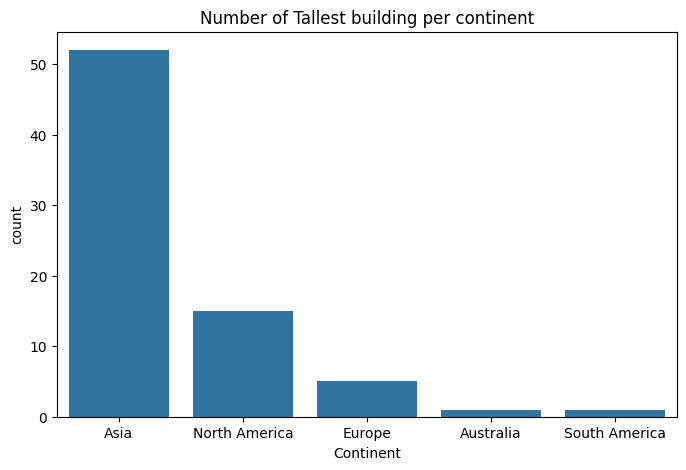

In [7]:

plt.figure(figsize=(8,5))
sns.countplot(data =df, x="Continent", order = df["Continent"].value_counts().index)
plt.title("Number of Tallest building per continent")
plt.show()


Now since we have figures out the continent with tallest building lets look into which countires in continent has highest tallest building

<h3>Top 10 countries with tallest building</h4>

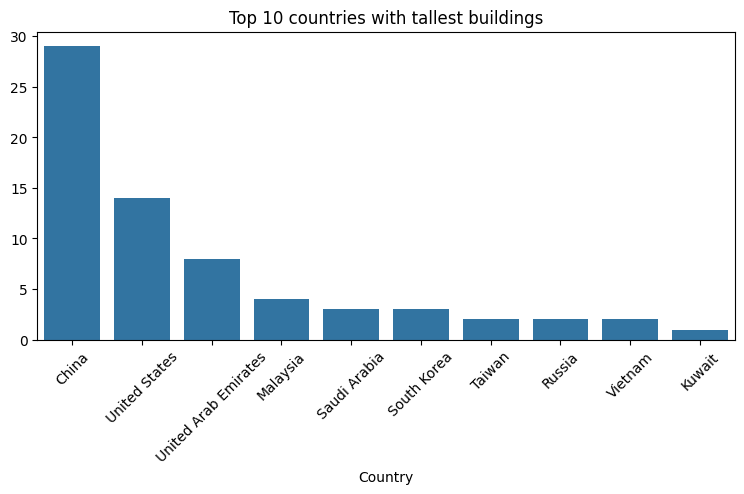

In [8]:

top_country = df['Country'].value_counts().head(10)
plt.figure(figsize=(9,4))
sns.barplot(x= top_country.index, y =top_country.values)
plt.xticks(rotation=45)
plt.title("Top 10 countries with tallest buildings")
plt.show()

As we can see most of the tallest building are in china and decreasing exponentially showing that urban population might be most in china(which is indeed true)

<h3>Top 10 cities with tallest building, now lets further look into which region(cities) has the most tallest building</h3>

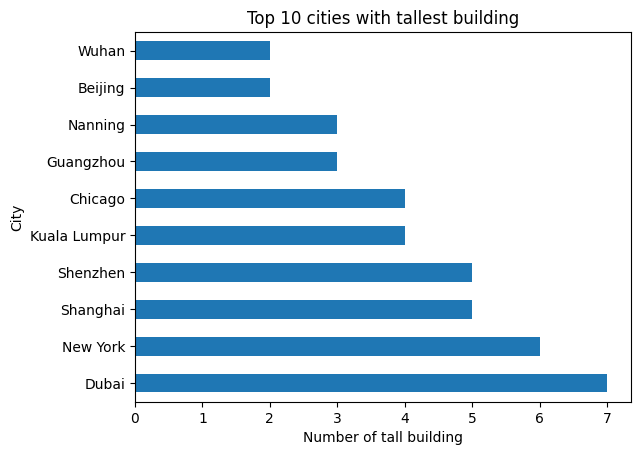

In [9]:
df['City'].value_counts().head(10).plot(kind = 'barh')
plt.title("Top 10 cities with tallest building")
plt.xlabel("Number of tall building")
plt.show()

Tall buildings are located in metropolitian cities, showcasing growth of mega-cities

<h3>Showcasing distribution of tallest building in differnet continent using pie chart </h3>

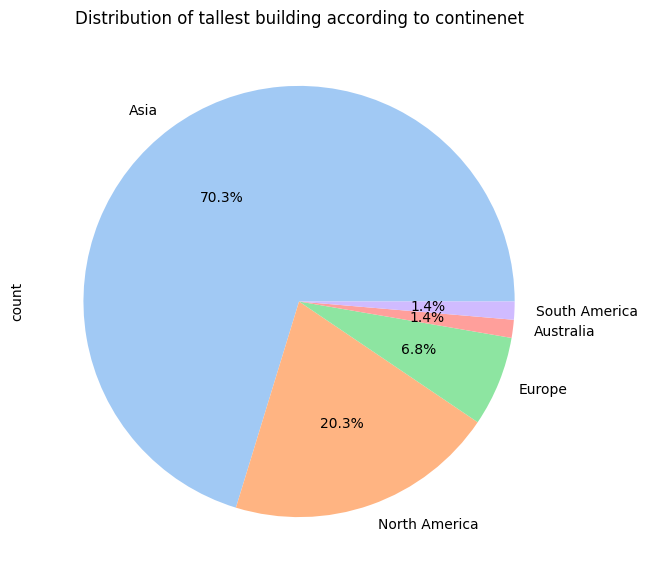

In [10]:
plt.figure(figsize=(7,7))
df['Continent'].value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title("Distribution of tallest building according to continenet")
plt.show()

<h3>Plotting graph for tallest building by continent and countries</h3>

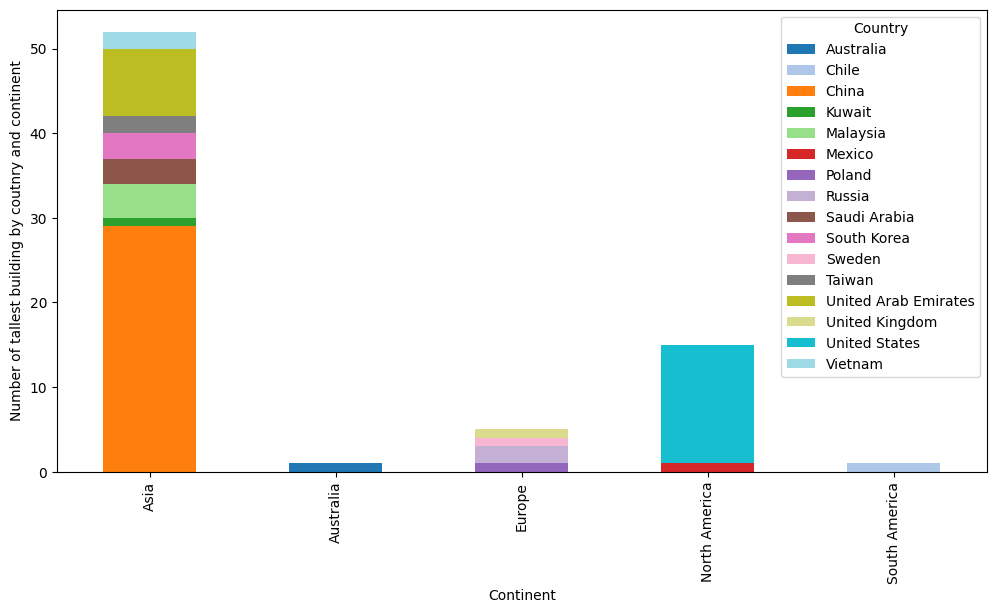

In [11]:
continent_country=df.groupby(['Continent','Country']).size().unstack(fill_value=0)
continent_country.plot(kind = "bar", stacked = True, figsize=(12,6),colormap='tab20')
plt.ylabel("Number of tallest building by coutnry and continent")
plt.show()

<h3>Plotting graph for tallest building by cities and country </h3>

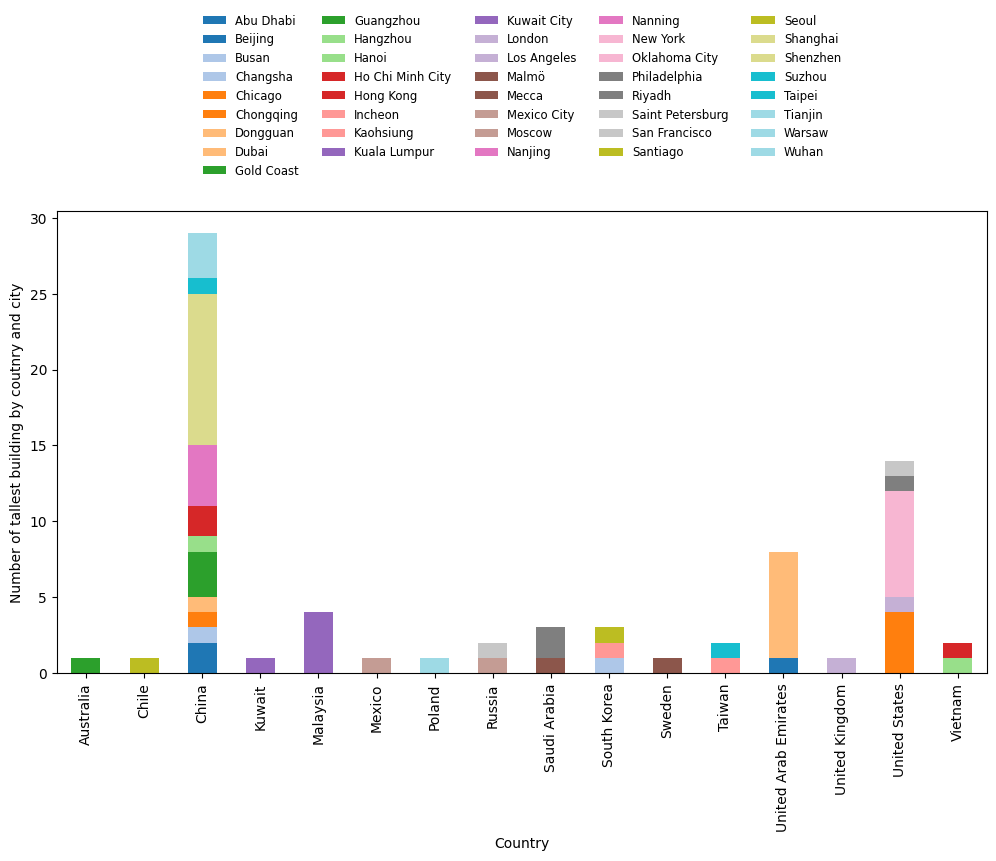

In [12]:
citi_country=df.groupby(['Country','City']).size().unstack(fill_value=0)
citi_country.plot(kind = "bar", stacked = True, figsize=(12,6),colormap='tab20')
plt.ylabel("Number of tallest building by coutnry and city", rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),ncols=5,frameon=False, fontsize='small')   
plt.show()